In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('data.csv')
print(data.shape)
data.head()
     

(511, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


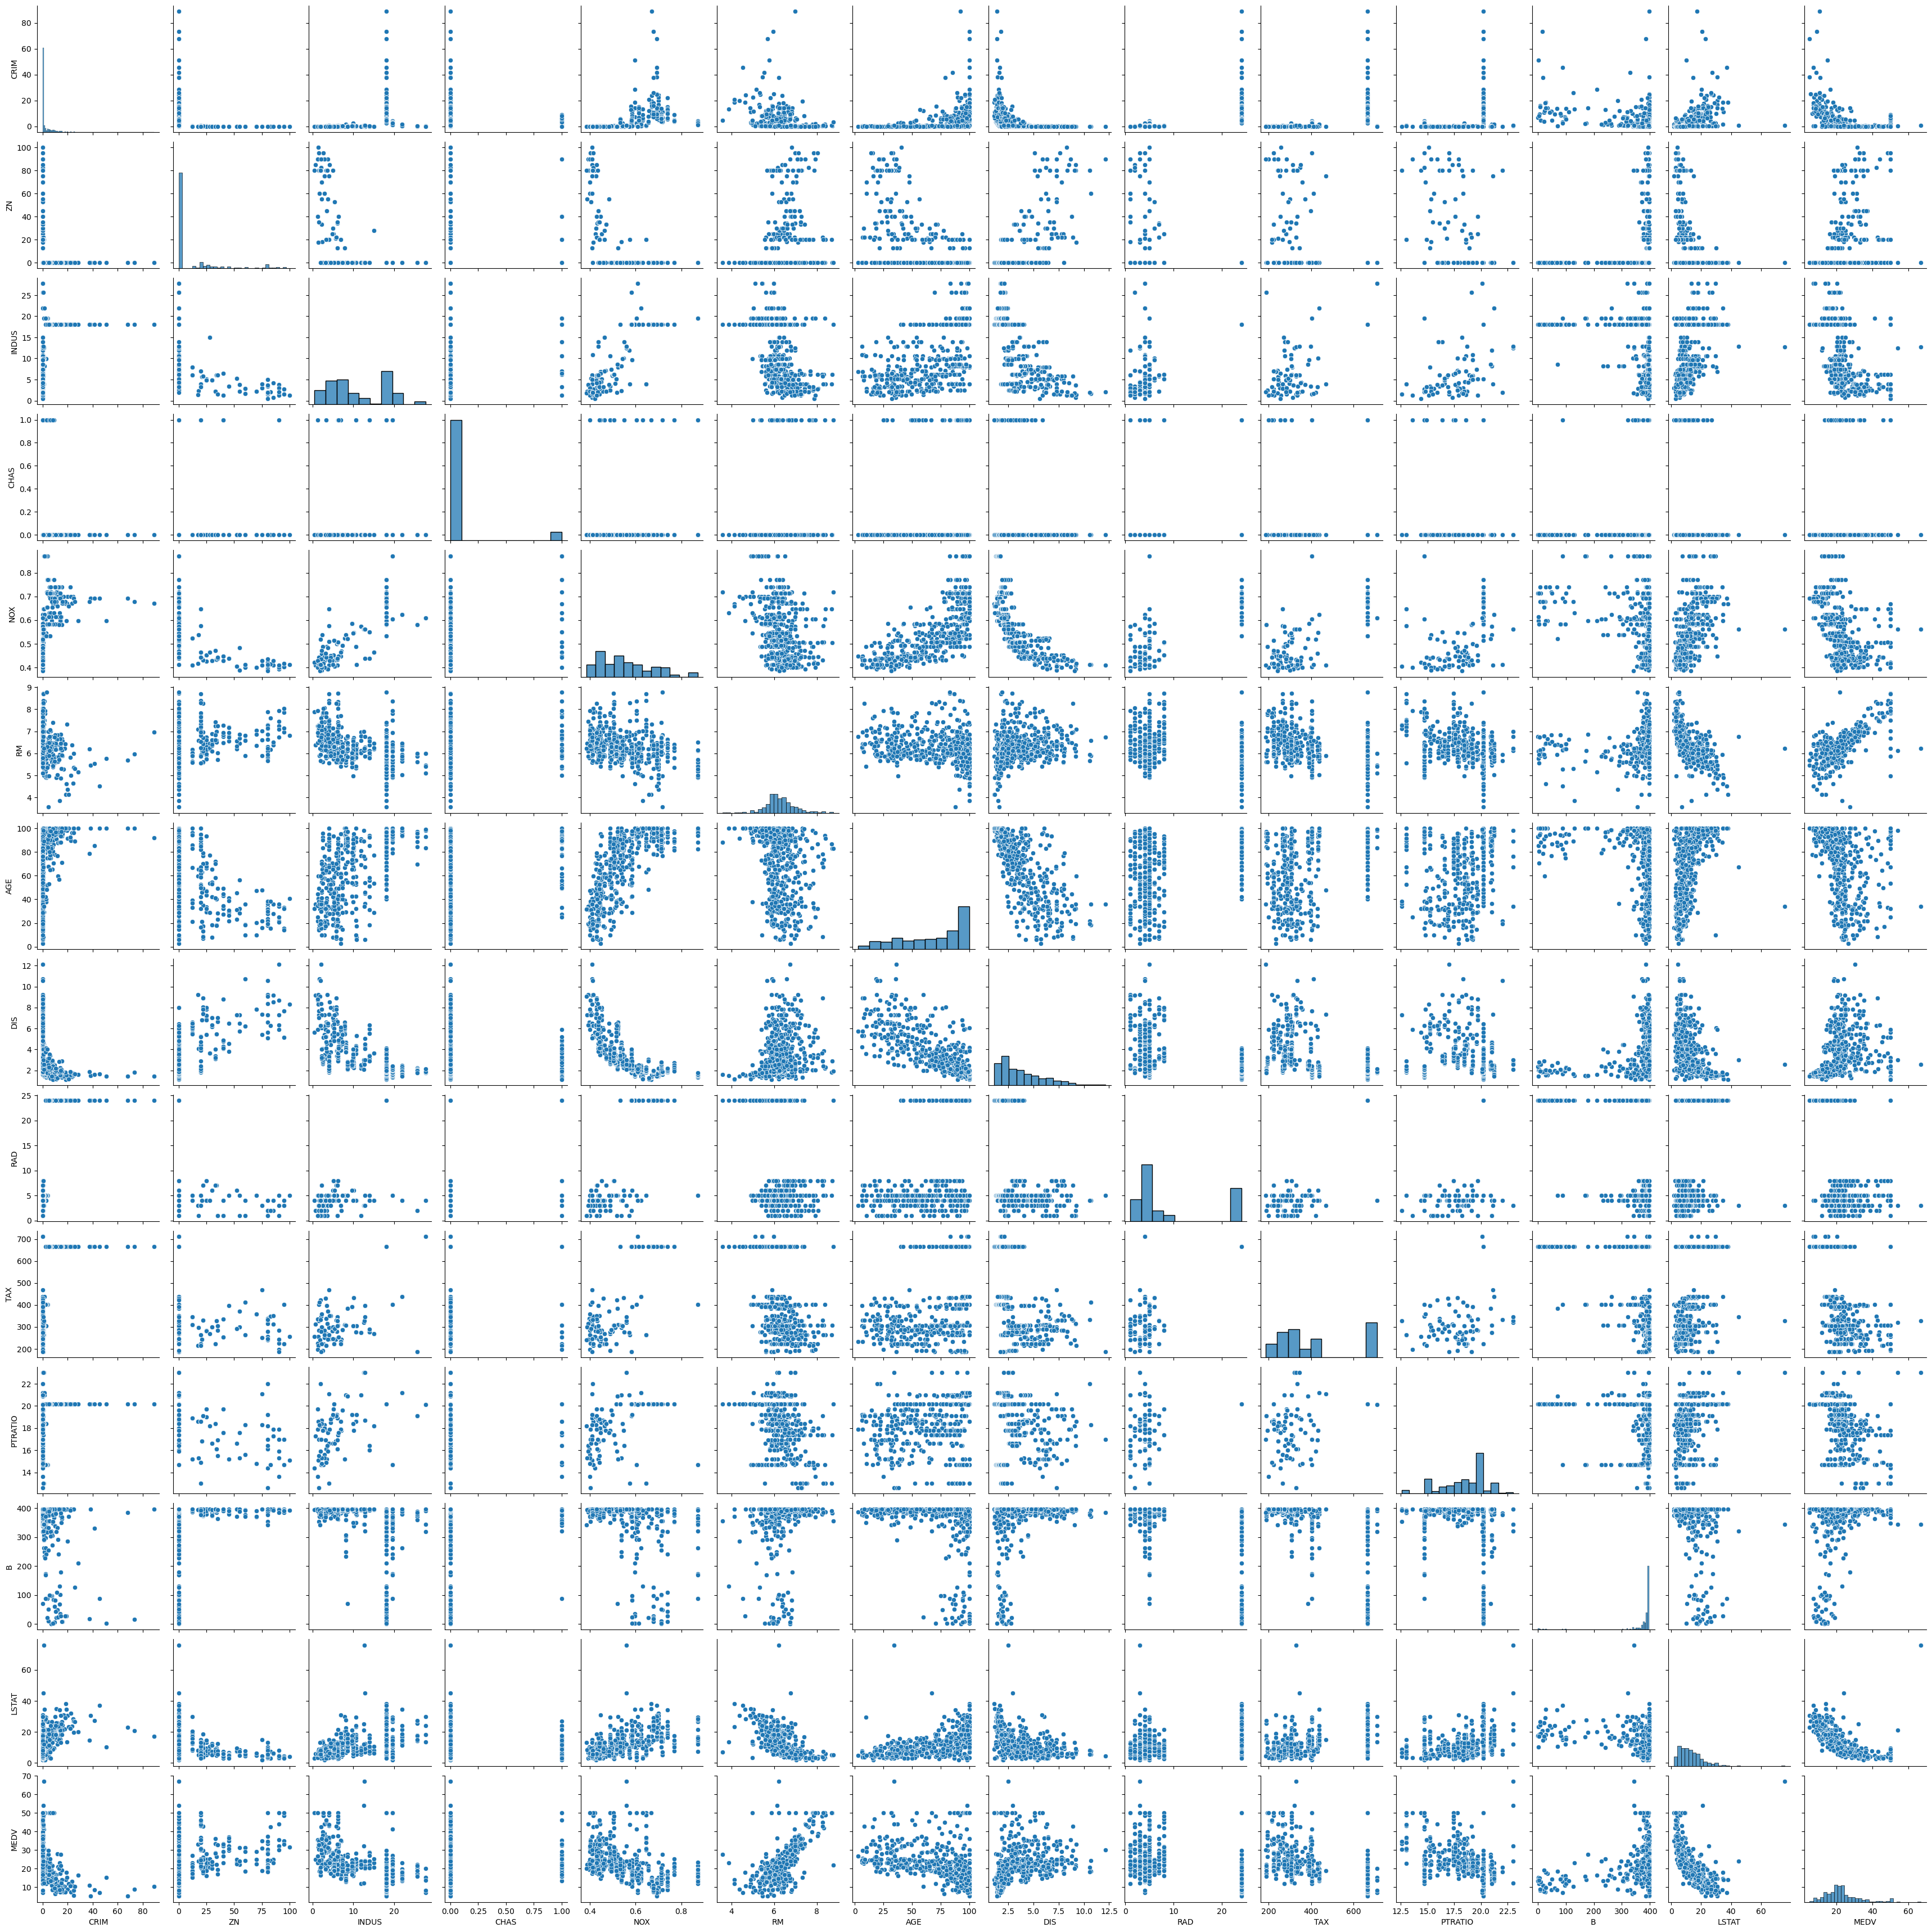

In [9]:
sns.pairplot(data)

In [11]:
X= data.drop('MEDV', axis=1)
y= data['MEDV']

In [12]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00


In [13]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
506    12.0
507    32.0
508    54.0
509    67.0
510    24.0
Name: MEDV, Length: 511, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [26]:
print (X_train.shape)
print(X_test.shape)
print( y_train.shape)
print(y_test.shape)

(459, 13)
(52, 13)
(459,)
(52,)


In [27]:
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.experimental import enable_hist_gradient_boosting  # Enable HistGradientBoosting
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [31]:
model= LinearRegression()

In [34]:
pd.DataFrame(model.coef_, X.columns, columns=['coeficient'])

AttributeError: 'HistGradientBoostingRegressor' object has no attribute 'coef_'

In [35]:
y_pred= model.predict(X_test)

In [44]:
pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred}).head()

,Y_test,Y_pred
32,13.2,14.945958
212,22.4,22.007116
227,31.6,31.495875
104,20.1,20.510443
83,22.9,23.393189


In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [59]:
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mean=(y_pred-y_test).mean()
print('r2 score:' ,score)
print('mean_absolute_error:',mae)
print('mean_squared_error:',mse)
print('mean_:',mean)
RMSE= np.sqrt(mse)
print('RMSE=', RMSE)

r2 score: 0.923127612375664
mean_absolute_error: 1.9461792786798489
mean_squared_error: 9.169546212825454
mean_: -0.32991881037151105
RMSE= 3.028125858154752


In [60]:
data['MEDV'].mean()

22.68219178082192

In [61]:
test_residuals= y_test-y_pred

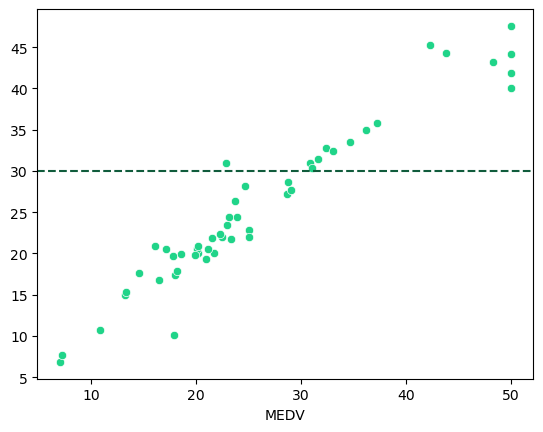

In [62]:
sns.scatterplot(x=y_test, y=y_pred, color='#20d489')
plt.axhline(y=30, color='#105c3c', ls='--')

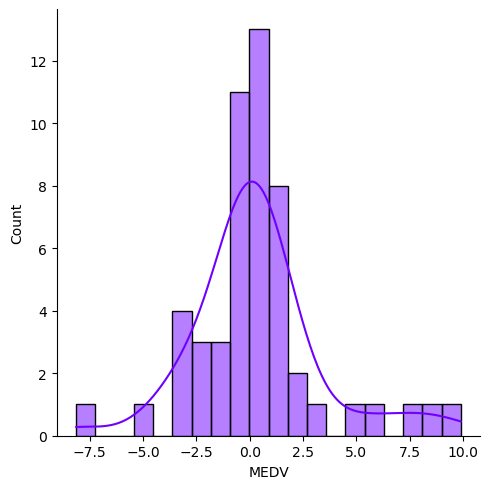

In [66]:
sns.displot(test_residuals, bins=20, kde=True, color='#6f00ff')
     

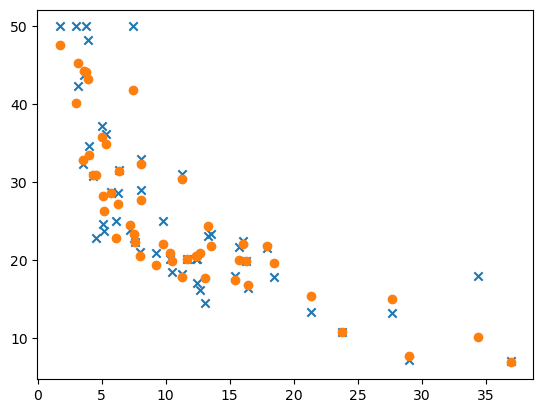

In [69]:
plt.scatter(X_test['LSTAT'],y_test, marker='x')
plt.scatter(X_test['LSTAT'],y_pred)

plt.show()